In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

## Central limit theorem

Considering a case of 6 headed dice

In [33]:
X = np.arange(1,7);X

array([1, 2, 3, 4, 5, 6])

Every number will have equal probability

In [5]:
p = np.repeat(1/6,6)

In [6]:
p

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

<Container object of 6 artists>

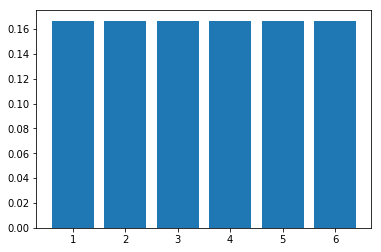

In [17]:
plt.bar(X,p)

In [37]:
print("Expectation of this distribution:",np.sum(X*p))

Expectation of this distribution: 3.5


In [39]:
print("Variance of this distribution:",np.sum((X**2)*p) - (np.sum(X*p))**2)

Variance of this distribution: 2.916666666666666


Let's simulate from this distribution to show the power of central limit theorem. According to CLT, expectation of sample mean theoretical distibution should be equal to the expectation of the underlying distribution and the variance of sample mean distribution should be equal to variance/n where n is the sample size taken for each simulation

In [53]:
def clt_simulation(X, n, p, num_sim=100):
    '''
    X: list of dice faces from which to simulate
    n: sample size (for ex: how many rolls of dice per simulation)
    p: probability distribution for underlying process
    num_sim: how many simulations to run
    '''
    l = []
    for i in range(num_sim):
        l.append(np.mean(np.random.choice(X, n, p=p)))
    sns.kdeplot(l)
    print("Mean of sampling distribution of sample mean:",np.mean(l))
    print("Variance of sampling distribution of sample mean:",np.var(l))
    print("Theoretical variance derived from CLT:",2.916666666666666/n)

Mean of sampling distribution of sample mean: 3.4997
Variance of sampling distribution of sample mean: 2.9445999100000004
Theoretical variance derived from CLT: 2.916666666666666


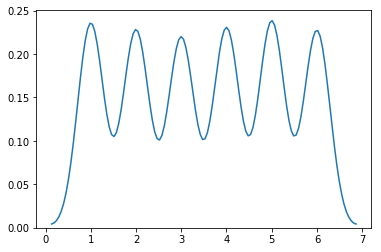

In [54]:
clt_simulation(X,1,p,10000)

Mean of sampling distribution of sample mean: 3.483975
Variance of sampling distribution of sample mean: 0.730574449375
Theoretical variance derived from CLT: 0.7291666666666665


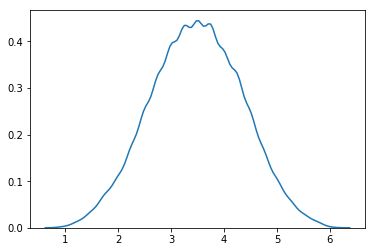

In [55]:
clt_simulation(X,4,p,10000)

Mean of sampling distribution of sample mean: 3.500775
Variance of sampling distribution of sample mean: 0.014626074374999999
Theoretical variance derived from CLT: 0.01458333333333333


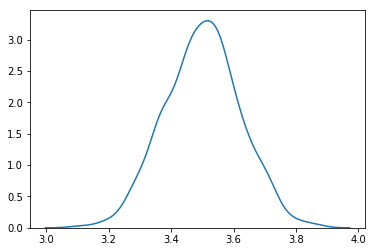

In [60]:
clt_simulation(X,200,p,1000)

In [61]:
def clt_simulation_sum(X, n, p, num_sim=100):
    '''
    X: list of dice faces from which to simulate
    n: sample size (for ex: how many rolls of dice per simulation)
    p: probability distribution for underlying process
    num_sim: how many simulations to run
    '''
    l = []
    for i in range(num_sim):
        l.append(np.sum(np.random.choice(X, n, p=p)))
    sns.kdeplot(l)
    print("Mean of sampling distribution of sample mean:",np.mean(l))
    print("Variance of sampling distribution of sample mean:",np.var(l))
    print("Theoretical variance derived from CLT:",2.916666666666666/n)

Mean of sampling distribution of sample mean: 698.762
Variance of sampling distribution of sample mean: 598.5013559999999
Theoretical variance derived from CLT: 0.01458333333333333


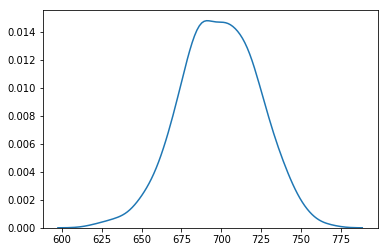

In [62]:
clt_simulation_sum(X,200,p,1000)

## Normal distribution

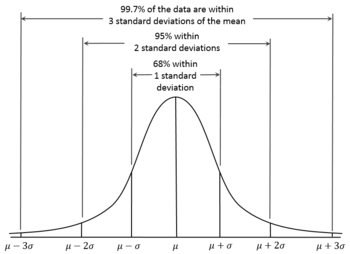

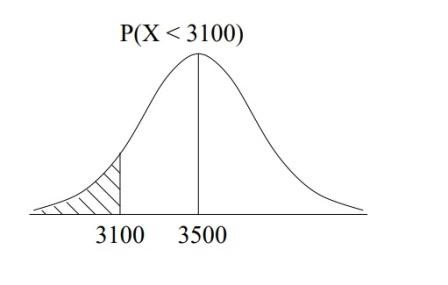

To compute the probability of the shaded area from this normal distributon. Mean = 3500 and sd = 500

In [65]:
A  = scipy.stats.norm(3500,500)

In [68]:
A.cdf(3100)

0.2118553985833967

## Confidence interval simulation

![pokemon](../imgs/mnm.jpg)

Let's say we have a bowl full of MnMs. Now I personally like yellow ones because yellow is my favorite color. Now the bowl that I have contains 10000 MnMs with 1000 yellow ones. So the proportion of yellow is 0.1 but I'm not aware of that. So how ca develop a confidence interval around the proportion of yellow MnMs?

In [69]:
y = np.ones(1000)

In [71]:
r = np.random.randint(2,6,9000)

In [81]:
mnm = np.concatenate((r,y),axis = 0)

In [99]:
sample = np.random.choice(mnm,size=1000,replace=True)

In [100]:
p_sample = np.mean(sample==1)

In [105]:
sd = np.sqrt(p_sample*(1-p_sample)/1000)

In [106]:
sd

0.00935900635751467

In [107]:
ci = [p_sample-sd,p_sample+sd]

In [108]:
ci

[0.08764099364248533, 0.10635900635751468]

In [112]:
1&0

0

In [113]:
1|0

1

In [161]:
def ci_simulator(mnm, sample_sz, num_simulation = 1000):
    p_original = np.mean(mnm == 1)
    ci_tracker = []
    for i in range(num_simulation):
        sample = np.random.choice(mnm, size=sample_sz, replace=False)
        p_sample = np.mean(sample == 1)
        se = np.sqrt(p_sample * (1 - p_sample) / sample_sz)
        ci_lwr = p_sample - 2*se
        ci_upr = p_sample + 2*se
        ci_tracker.append((p_original > ci_lwr) & (p_original < ci_upr))
    return np.mean(ci_tracker)

In [166]:
ci_simulator(mnm,2000,1000)

0.968